In [ ]:
!pip install yfinance --upgrade --quiet

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Define the stock ticker
ticker = "MSFT"

# Download the data for 6 months with 1-day interval
data = yf.download(ticker, period="6mo", interval="1d")

#first 5 rows
data.head()

/tmp/ipython-input-2528843982.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="6mo", interval="1d")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2025-02-21,407.461945,417.283909,407.142554,416.575219,27524800
2025-02-24,403.259674,408.619829,398.588257,407.761419,26443700
2025-02-25,397.170837,401.183490,395.973055,400.364986,29387400
2025-02-26,398.997498,402.860401,393.527529,397.280648,19619000
2025-02-27,391.810699,404.996484,391.451374,400.534674,21127400


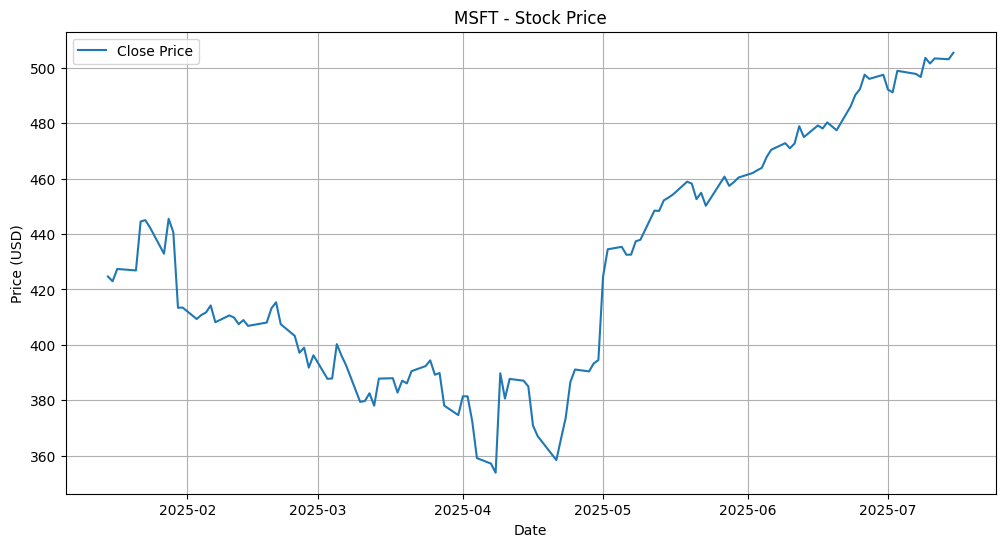

In [ ]:
plt.figure(figsize=(12,6))

if 'Adj Close' in data.columns:
    plt.plot(data['Adj Close'], label='Adjusted Close Price')
else:
    plt.plot(data['Close'], label='Close Price')

plt.title(f"{ticker} - Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()

/tmp/ipython-input-2177368968.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("MSFT", period="5d", interval="1m")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2177368968.py:14: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_resampled = data.resample('10T').agg({


Columns: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')
Shape: (1939, 5)


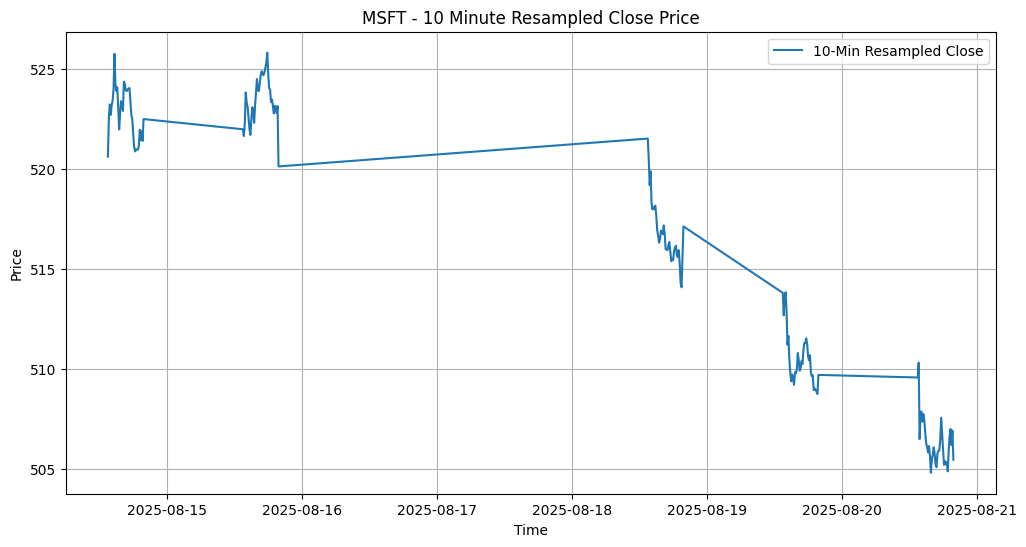

In [ ]:
# Step 1: Download 1-minute data
data = yf.download("MSFT", period="5d", interval="1m")
data.columns = data.columns.get_level_values(0)  # This is the key fix

#Check data
print("Columns:", data.columns)
print("Shape:", data.shape)
data.head()

#Set datetime index
data.index = pd.to_datetime(data.index)

#Resample to 10-minute intervals
data_resampled = data.resample('10T').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).dropna()

#Plot resampled close price
plt.figure(figsize=(12,6))
plt.plot(data_resampled['Close'], label='10-Min Resampled Close')
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("MSFT - 10 Minute Resampled Close Price")
plt.grid(True)
plt.legend()
plt.show()

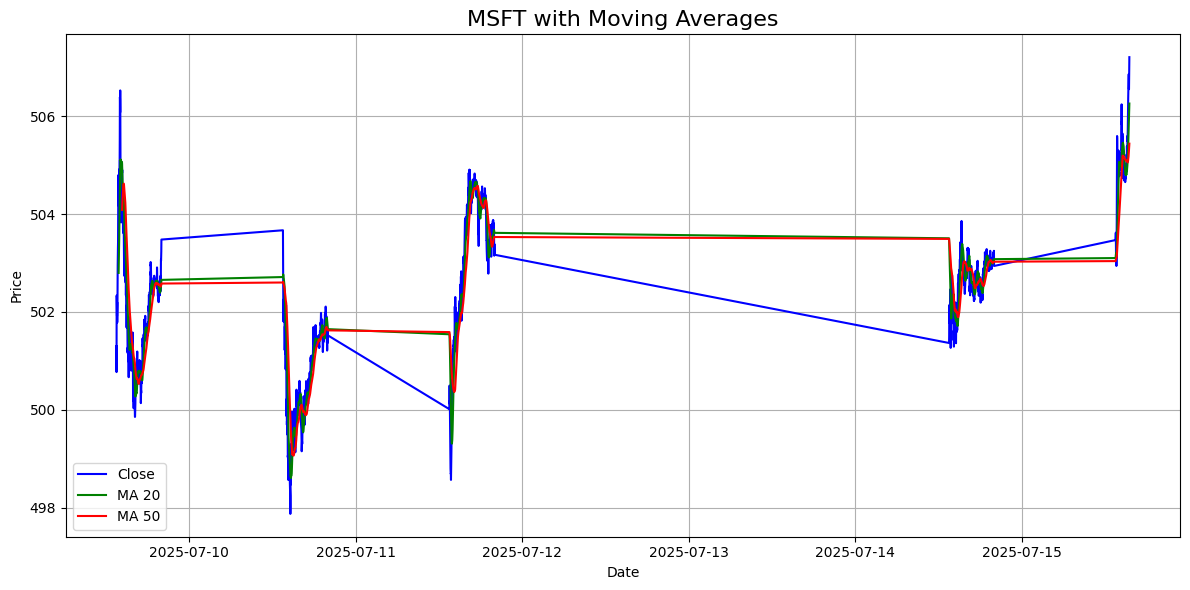

In [ ]:
# Calculate 20-period and 50-period moving averages
data['MA20'] = data[price_column].rolling(window=20).mean()
data['MA50'] = data[price_column].rolling(window=50).mean()

# Plot with MAs
plt.figure(figsize=(12,6))
plt.plot(data[price_column], label=price_column, color='blue')
plt.plot(data['MA20'], label='MA 20', color='green')
plt.plot(data['MA50'], label='MA 50', color='red')

plt.title("MSFT with Moving Averages", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
msft = yf.Ticker("MSFT")
info = msft.info
print("🔹 Price to Book Ratio:", info.get("priceToBook"))
print("🔹 Price to Earnings (P/E) Ratio:", info.get("trailingPE"))
print("🔹 Market Cap (in USD):", info.get("marketCap"))

🔹 Price to Book Ratio: 11.702079
🔹 Price to Earnings (P/E) Ratio: 39.187935
🔹 Market Cap (in USD): 3766068183040


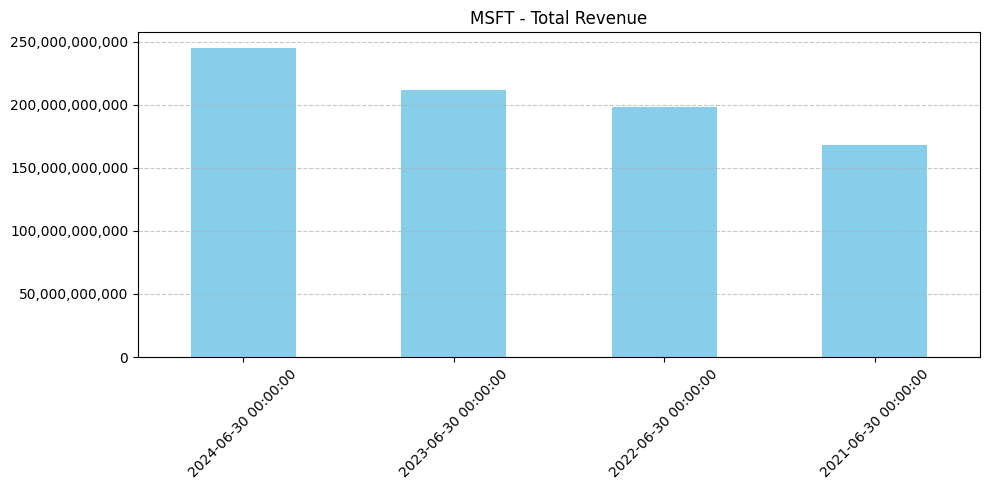

In [ ]:
import matplotlib.ticker as ticker

# Plot bar chart with revenue
ax = revenue.plot(kind='bar', figsize=(10, 5), title="MSFT - Total Revenue", color='skyblue')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

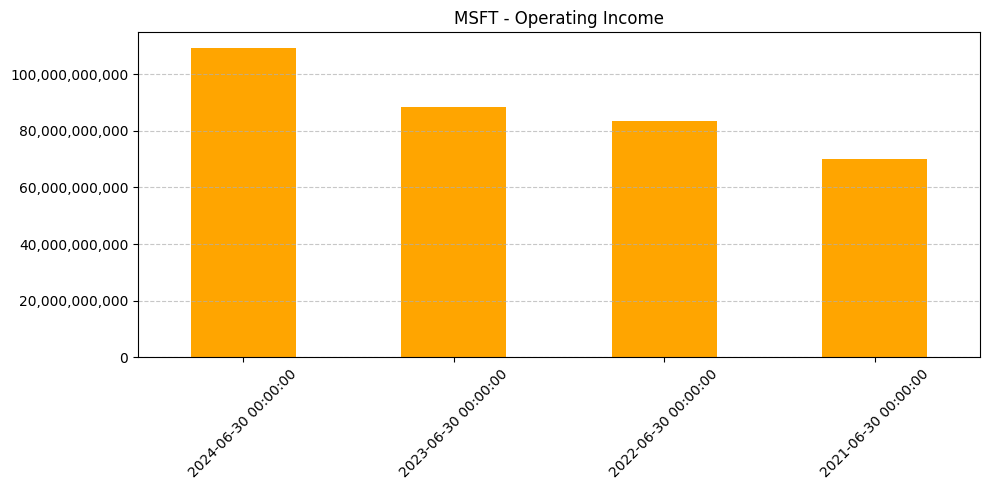

In [ ]:
ebit = msft.financials.loc['Operating Income']
# Plot bar chart with EBIT
ax = ebit.plot(kind='bar', figsize=(10, 5), title="MSFT - Operating Income", color='orange')

# Format Y-axis with commas
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# visuals
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
msft.cashflow

,2024-06-30,2023-06-30,2022-06-30,2021-06-30
Free Cash Flow,7.407100e+10,5.947500e+10,6.514900e+10,5.611800e+10
Repurchase Of Capital Stock,-1.725400e+10,-2.224500e+10,-3.269600e+10,-2.738500e+10
Repayment Of Debt,-2.907000e+10,-2.750000e+09,-9.023000e+09,-3.750000e+09
Issuance Of Debt,2.964500e+10,0.000000e+00,0.000000e+00,NaN
Issuance Of Capital Stock,2.002000e+09,1.866000e+09,1.841000e+09,1.693000e+09
Capital Expenditure,-4.447700e+10,-2.810700e+10,-2.388600e+10,-2.062200e+10
End Cash Position,1.831500e+10,3.470400e+10,1.393100e+10,1.422400e+10
Beginning Cash Position,3.470400e+10,1.393100e+10,1.422400e+10,1.357600e+10
Effect Of Exchange Rate Changes,-2.100000e+08,-1.940000e+08,-1.410000e+08,-2.900000e+07
Changes In Cash,-1.617900e+10,2.096700e+10,-1.520000e+08,6.770000e+08


In [ ]:
msft.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power 

In [ ]:
msft.balance_sheet

,2024-06-30,2023-06-30,2022-06-30,2021-06-30
Ordinary Shares Number,7.434139e+09,7.432000e+09,7.464000e+09,7.519000e+09
Share Issued,7.434139e+09,7.432000e+09,7.464000e+09,7.519000e+09
Net Debt,3.331500e+10,1.253300e+10,3.585000e+10,4.392200e+10
Total Debt,6.712700e+10,5.996500e+10,6.127000e+10,6.777500e+10
Tangible Book Value,1.216600e+11,1.289710e+11,8.772000e+10,8.447700e+10
...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,7.553100e+10,1.112560e+11,1.047490e+11,1.302560e+11
Other Short Term Investments,5.721600e+10,7.655200e+10,9.081800e+10,1.160320e+11
Cash And Cash Equivalents,1.831500e+10,3.470400e+10,1.393100e+10,1.422400e+10
Cash Equivalents,6.744000e+09,2.622600e+10,5.673000e+09,6.952000e+09


In [ ]:
msft.financials

,2024-06-30,2023-06-30,2022-06-30,2021-06-30
Tax Effect Of Unusual Items,-9.991800e+07,-2.850000e+06,4.375400e+07,1.801608e+08
Tax Rate For Calcs,1.820000e-01,1.900000e-01,1.310000e-01,1.382660e-01
Normalized EBITDA,1.335580e+11,1.051550e+11,9.990500e+10,8.383100e+10
Total Unusual Items,-5.490000e+08,-1.500000e+07,3.340000e+08,1.303000e+09
Total Unusual Items Excluding Goodwill,-5.490000e+08,-1.500000e+07,3.340000e+08,1.303000e+09
Net Income From Continuing Operation Net Minority Interest,8.813600e+10,7.236100e+10,7.273800e+10,6.127100e+10
Reconciled Depreciation,2.228700e+10,1.386100e+10,1.446000e+10,1.168600e+10
Reconciled Cost Of Revenue,7.411400e+10,6.586300e+10,6.265000e+10,5.223200e+10
EBITDA,1.330090e+11,1.051400e+11,1.002390e+11,8.513400e+10
EBIT,1.107220e+11,9.127900e+10,8.577900e+10,7.344800e+10


**CONCLUSION**:

In this stock market analysis of Microsoft (MSFT), we have explored key elements that reflect its current financial health and market performance:

**1. Stock Price Trends:** The stock price over time shows a consistent upward movement, indicating strong market demand. The plotted price chart highlights significant growth, which is an indicator of investor confidence.


**2. Moving Averages:** We calculated the 20-period and 50-period moving averages, which further confirm the positive trend in MSFT's stock. The 20-period moving average, in particular, has been a reliable indicator of short-term price movements, supporting the belief in its upward trajectory.


**3. Financial Metrics:** MSFT's financial data, including its market cap, P/E ratio, and operating income, reflect a company in good financial health. Revenue and net income have shown positive growth, making MSFT an attractive investment option.


**4. Resampled Data:** By resampling the stock data to 10-minute intervals, we gained a closer look at its short-term price fluctuations. This insight helped us track the stock's volatility and key turning points in the market.


**5. Operating Income & Cash Flow:** The company’s operating income and free cash flow have demonstrated solid growth, underscoring its financial stability and strong cash management.


**6. Balance Sheet:** Key balance sheet items such as total debt, tangible book value, and cash equivalents indicate that MSFT is financially sound, with a healthy balance between debt and cash reserves.



In conclusion, Microsoft’s stock shows promising growth potential, backed by strong financials and consistent market performance. The company remains in a solid position for both short-term and long-term investments, making it a top contender in the tech sector.